In [13]:
import pandas as pd
import numpy as np
import glob
import os

data = pd.read_csv('Train 400.csv')
train = data[['0_Max power spectrum', '0_Maximum frequency', '0_Median frequency', '0_Power bandwidth', 
             '0_Spectral centroid', '0_Spectral decrease', '0_Spectral distance', '0_Spectral entropy', 
             '0_Spectral positive turning points', '0_Spectral skewness','0_Spectral spread', '0_Spectral variation', 
             '0_Wavelet absolute mean_0','0_Wavelet energy_3','0_Wavelet standard deviation_8','0_Histogram_9',
             '0_Interquartile range', '0_Kurtosis', '0_Max', '0_Mean', '0_Mean absolute deviation', '0_Median', 
             '0_Median absolute deviation', '0_Min', '0_Root mean square', '0_Skewness', '0_Standard deviation',
             '0_Entropy', '0_Mean absolute diff', '0_Mean diff', '0_Median absolute diff', '0_Median diff', 
             '0_Negative turning points', '0_Neighbourhood peaks', '0_Peak to peak distance', 
             '0_Positive turning points', '0_Signal distance', '0_Slope','Label']]


In [14]:
train.describe()

,0_Max power spectrum,0_Maximum frequency,0_Median frequency,0_Power bandwidth,0_Spectral centroid,0_Spectral decrease,0_Spectral distance,0_Spectral entropy,0_Spectral positive turning points,0_Spectral skewness,...,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Peak to peak distance,0_Positive turning points,0_Signal distance,0_Slope,Label
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,...,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,2.144531,26.184930,0.523857,6.234223,4.596134,-7.231890,-30336.343863,0.217181,62.262136,3.466129,...,0.000008,0.020169,0.000297,45.650485,3.229369,0.682173,45.649272,399.333035,-0.000003,1.500000
std,0.624814,13.213933,1.063615,14.159279,3.456786,4.177014,5499.451495,0.194141,5.672446,1.760655,...,0.000666,0.019650,0.001402,39.226007,2.221525,0.217526,39.263939,0.708861,0.000329,1.118713
min,0.105915,1.256281,0.000000,0.250000,0.713219,-75.734604,-44864.606962,0.006276,37.000000,0.647868,...,-0.001596,0.000861,-0.003325,2.000000,0.000000,0.064039,1.000000,399.000664,-0.001214,0.000000
25%,2.046952,16.017588,0.000000,0.500000,2.409566,-9.083256,-35225.181780,0.075764,60.000000,2.624270,...,-0.000358,0.011628,0.000000,11.000000,2.000000,0.515878,11.000000,399.040355,-0.000238,0.750000
50%,2.389224,29.899497,0.000000,0.500000,4.084506,-6.209475,-29697.509474,0.167758,63.000000,2.949172,...,0.000007,0.013615,0.000000,35.500000,3.000000,0.754688,37.000000,399.066257,0.000006,1.500000
75%,2.576417,34.924623,0.753769,0.500000,4.775818,-4.448898,-26504.926185,0.278021,66.000000,4.296061,...,0.000424,0.016129,0.000624,76.000000,4.000000,0.854866,75.000000,399.119950,0.000209,2.250000
max,2.951702,46.482412,9.045226,48.500000,15.266907,-2.514524,-12730.681687,0.901908,75.000000,10.201633,...,0.001614,0.071429,0.011538,137.000000,14.000000,0.976744,135.000000,401.640894,0.001161,3.000000


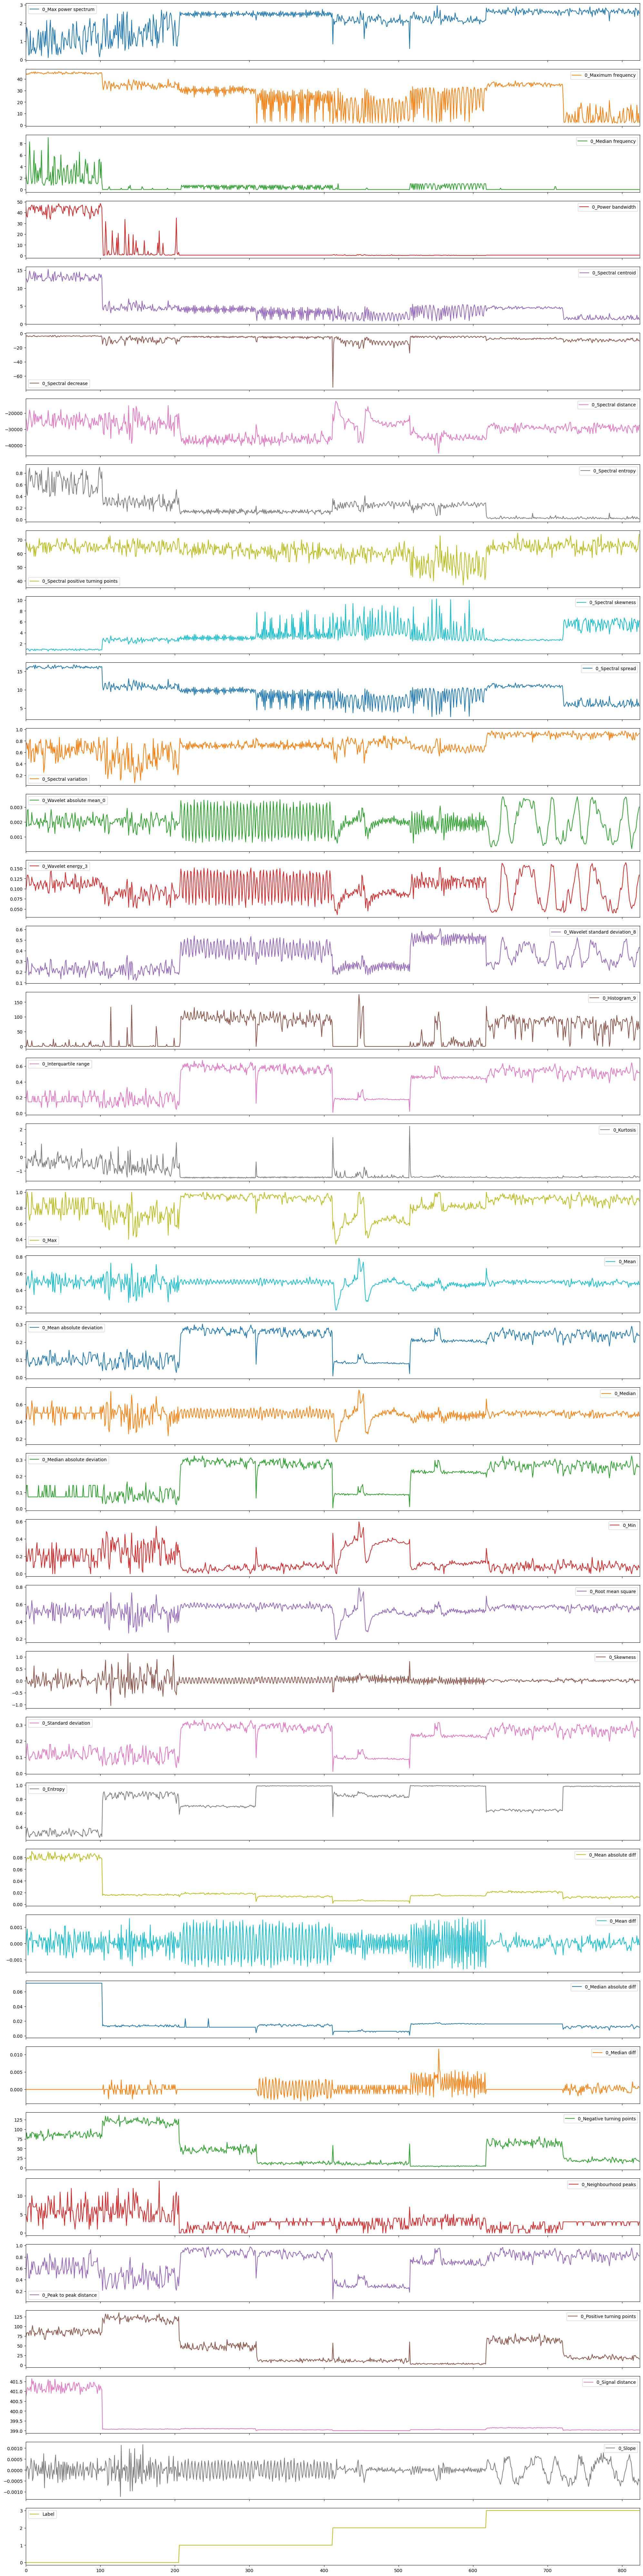

In [15]:
import matplotlib.pyplot as plt

train.plot(subplots=True,figsize=(20, 80))
plt.tight_layout()
plt.xlim([0, 824])
plt.show()

In [16]:
def stratified_split(train, target, val_percent=0.2):
    '''
    Function to split a dataframe into train and validation sets, while preserving the ratio of the labels in the target variable
    Inputs:
    - df, the dataframe
    - target, the target variable
    - val_percent, the percentage of validation samples, default 0.2
    Outputs:
    - train_idxs, the indices of the training dataset
    - val_idxs, the indices of the validation dataset
    '''
    classes=list(train[target].unique())
    train_idxs, val_idxs = [], []
    for c in classes:
        idx=list(train[train[target]==c].index)
        np.random.shuffle(idx)
        val_size=int(len(idx)*val_percent)
        val_idxs+=idx[:val_size]
        train_idxs+=idx[val_size:]
    return train_idxs, val_idxs


train_idxs, val_idxs = stratified_split(train, 'Label', val_percent=0.1)

val_idxs, test_idxs = stratified_split(train[train.index.isin(val_idxs)], 'Label', val_percent=0.9)

In [17]:
def test_stratified(train, col):
    '''
    Analyzes the ratio of different classes in a categorical variable within a dataframe
    Inputs:
    - dataframe
    - categorical column to be analyzed
    Returns: None
    '''
    classes=list(train[col].unique())
    
    for c in classes:
        print(f'Proportion of records with {c}: {len(train[train[col]==c])*1./len(train):0.2} ({len(train[train[col]==c])} / {len(train)})')

In [18]:
print('---------- STRATIFIED SAMPLING REPORT ----------')
print('-------- Label proportions in FULL data --------')
test_stratified(train, 'Label')
print('-------- Label proportions in TRAIN data --------')
test_stratified(train[train.index.isin(train_idxs)], 'Label')
print('------ Label proportions in VALIDATION data -----')
test_stratified(train[train.index.isin(val_idxs)], 'Label')
print('-------- Label proportions in TEST data ---------')
test_stratified(train[train.index.isin(test_idxs)], 'Label')

---------- STRATIFIED SAMPLING REPORT ----------
-------- Label proportions in FULL data --------
Proportion of records with 0: 0.25 (206 / 824)
Proportion of records with 1: 0.25 (206 / 824)
Proportion of records with 2: 0.25 (206 / 824)
Proportion of records with 3: 0.25 (206 / 824)
-------- Label proportions in TRAIN data --------
Proportion of records with 0: 0.25 (186 / 744)
Proportion of records with 1: 0.25 (186 / 744)
Proportion of records with 2: 0.25 (186 / 744)
Proportion of records with 3: 0.25 (186 / 744)
------ Label proportions in VALIDATION data -----
Proportion of records with 0: 0.25 (2 / 8)
Proportion of records with 1: 0.25 (2 / 8)
Proportion of records with 2: 0.25 (2 / 8)
Proportion of records with 3: 0.25 (2 / 8)
-------- Label proportions in TEST data ---------
Proportion of records with 0: 0.25 (18 / 72)
Proportion of records with 1: 0.25 (18 / 72)
Proportion of records with 2: 0.25 (18 / 72)
Proportion of records with 3: 0.25 (18 / 72)


In [19]:
train_df = train[train.index.isin(train_idxs)]
X_train = train_df[['0_Max power spectrum', '0_Maximum frequency', '0_Median frequency', '0_Power bandwidth', 
             '0_Spectral centroid', '0_Spectral decrease', '0_Spectral distance', '0_Spectral entropy', 
             '0_Spectral positive turning points', '0_Spectral skewness','0_Spectral spread', '0_Spectral variation', 
             '0_Wavelet absolute mean_0','0_Wavelet energy_3','0_Wavelet standard deviation_8','0_Histogram_9',
             '0_Interquartile range', '0_Kurtosis', '0_Max', '0_Mean', '0_Mean absolute deviation', '0_Median', 
             '0_Median absolute deviation', '0_Min', '0_Root mean square', '0_Skewness', '0_Standard deviation',
             '0_Entropy', '0_Mean absolute diff', '0_Mean diff', '0_Median absolute diff', '0_Median diff', 
             '0_Negative turning points', '0_Neighbourhood peaks', '0_Peak to peak distance', 
             '0_Positive turning points', '0_Signal distance', '0_Slope']].values
Y_train = train_df[['Label']].values
print('Retrieved Training Data')
val_df = train[train.index.isin(val_idxs)]
X_val = val_df[['0_Max power spectrum', '0_Maximum frequency', '0_Median frequency', '0_Power bandwidth', 
             '0_Spectral centroid', '0_Spectral decrease', '0_Spectral distance', '0_Spectral entropy', 
             '0_Spectral positive turning points', '0_Spectral skewness','0_Spectral spread', '0_Spectral variation', 
             '0_Wavelet absolute mean_0','0_Wavelet energy_3','0_Wavelet standard deviation_8','0_Histogram_9',
             '0_Interquartile range', '0_Kurtosis', '0_Max', '0_Mean', '0_Mean absolute deviation', '0_Median', 
             '0_Median absolute deviation', '0_Min', '0_Root mean square', '0_Skewness', '0_Standard deviation',
             '0_Entropy', '0_Mean absolute diff', '0_Mean diff', '0_Median absolute diff', '0_Median diff', 
             '0_Negative turning points', '0_Neighbourhood peaks', '0_Peak to peak distance', 
             '0_Positive turning points', '0_Signal distance', '0_Slope']].values
Y_val = val_df[['Label']].values
print('Retrieved Validation Data')
test_df = train[train.index.isin(test_idxs)]
X_test = test_df[['0_Max power spectrum', '0_Maximum frequency', '0_Median frequency', '0_Power bandwidth', 
             '0_Spectral centroid', '0_Spectral decrease', '0_Spectral distance', '0_Spectral entropy', 
             '0_Spectral positive turning points', '0_Spectral skewness','0_Spectral spread', '0_Spectral variation', 
             '0_Wavelet absolute mean_0','0_Wavelet energy_3','0_Wavelet standard deviation_8','0_Histogram_9',
             '0_Interquartile range', '0_Kurtosis', '0_Max', '0_Mean', '0_Mean absolute deviation', '0_Median', 
             '0_Median absolute deviation', '0_Min', '0_Root mean square', '0_Skewness', '0_Standard deviation',
             '0_Entropy', '0_Mean absolute diff', '0_Mean diff', '0_Median absolute diff', '0_Median diff', 
             '0_Negative turning points', '0_Neighbourhood peaks', '0_Peak to peak distance', 
             '0_Positive turning points', '0_Signal distance', '0_Slope']].values
Y_test = test_df[['Label']].values
print('Retrieved Test Data')

Retrieved Training Data
Retrieved Validation Data
Retrieved Test Data


In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
#store data, all in numpy arrays
training_data = {'X_train':X_train,'Y_train':Y_train,
                 'X_val': X_val,'Y_val':Y_val,
                 'X_test': X_test,'Y_test':Y_test}

In [21]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#allow logloss and classification error plots for each iteraetion of xgb model
def plot_compare(metrics,eval_results,epochs):
    for m in metrics:
        test_score = eval_results['val'][m]
        train_score = eval_results['train'][m]
        rang = range(0, epochs)
        plt.rcParams["figure.figsize"] = [6,6]
        plt.plot(rang, test_score,"c", label="test")
        plt.plot(rang, train_score,"orange", label="Train")
        title_name = m + " plot"
        plt.title(title_name)
        plt.xlabel('Iterations')
        plt.ylabel(m)
        lgd = plt.legend()
        plt.show()
        
def fitXgb(sk_model, training_data=training_data,epochs=10):
    print('Fitting model...')
    sk_model.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))
    print('Fitting done!')
    train = xgb.DMatrix(training_data['X_train'], label=training_data['Y_train'])
    val = xgb.DMatrix(training_data['X_val'], label=training_data['Y_val'])
    params = sk_model.get_xgb_params()
    metrics = ['mlogloss']
    params['eval_metric'] = metrics
    store = {}
    evallist = [(val, 'val'),(train,'train')]
    xgb_model = xgb.train(params, train, epochs, evallist,evals_result=store,verbose_eval=100)
    print('-- Model Report --')
    Y_train_pred = sk_model.predict(training_data['X_train'])
    Y_test_pred = sk_model.predict(training_data['X_test'])
    print('XGBoost Train Accuracy: '+str(accuracy_score(training_data['Y_train'],Y_train_pred)))
    print('XGBoost Test Accuracy: '+str(accuracy_score(training_data['Y_test'],Y_test_pred)))
    #print('XGBoost F1-Score (Micro): '+str(f1_score(training_data['Y_test'],Y_test_pred,average=None)))
    print('XGBoost Classification Report: '+str(classification_report(training_data['Y_test'],Y_test_pred)))
    cm = confusion_matrix(Y_test, Y_test_pred)
    cm_df = pd.DataFrame(cm,index = ['0','1','2','3'], columns = ['0','1','2','3'])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()
    #print(Y_train_pred)
    #print(Y_test_pred)
    plot_compare(metrics,store,epochs)
    features = ['0_Max power spectrum', '0_Maximum frequency', '0_Median frequency', '0_Power bandwidth', 
             '0_Spectral centroid', '0_Spectral decrease', '0_Spectral distance', '0_Spectral entropy', 
             '0_Spectral positive turning points', '0_Spectral skewness','0_Spectral spread', '0_Spectral variation', 
             '0_Wavelet absolute mean_0','0_Wavelet energy_3','0_Wavelet standard deviation_8','0_Histogram_9',
             '0_Interquartile range', '0_Kurtosis', '0_Max', '0_Mean', '0_Mean absolute deviation', '0_Median', 
             '0_Median absolute deviation', '0_Min', '0_Root mean square', '0_Skewness', '0_Standard deviation',
             '0_Entropy', '0_Mean absolute diff', '0_Mean diff', '0_Median absolute diff', '0_Median diff', 
             '0_Negative turning points', '0_Neighbourhood peaks', '0_Peak to peak distance', 
             '0_Positive turning points', '0_Signal distance', '0_Slope']
    f, ax = plt.subplots(figsize=(100,40))
    plot = sns.barplot(x=features, y=sk_model.feature_importances_)
    ax.set_title('Feature Importance')
    plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
    plt.show()


Fitting model...
[05:13:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting done!
[0]	val-mlogloss:1.04884	train-mlogloss:1.02670
[9]	val-mlogloss:0.20918	train-mlogloss:0.14791
-- Model Report --
XGBoost Train Accuracy: 1.0
XGBoost Test Accuracy: 0.9861111111111112
XGBoost Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00        18
           3       1.00      0.94      0.97        18

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



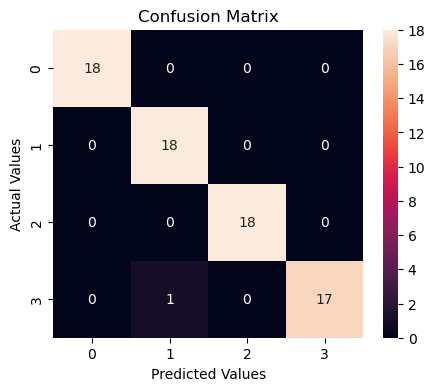

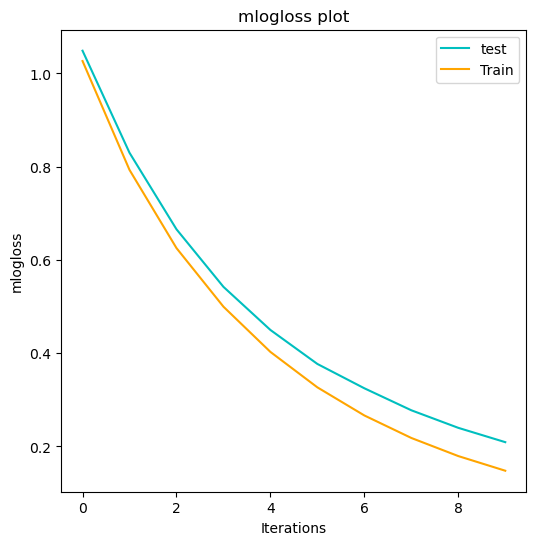

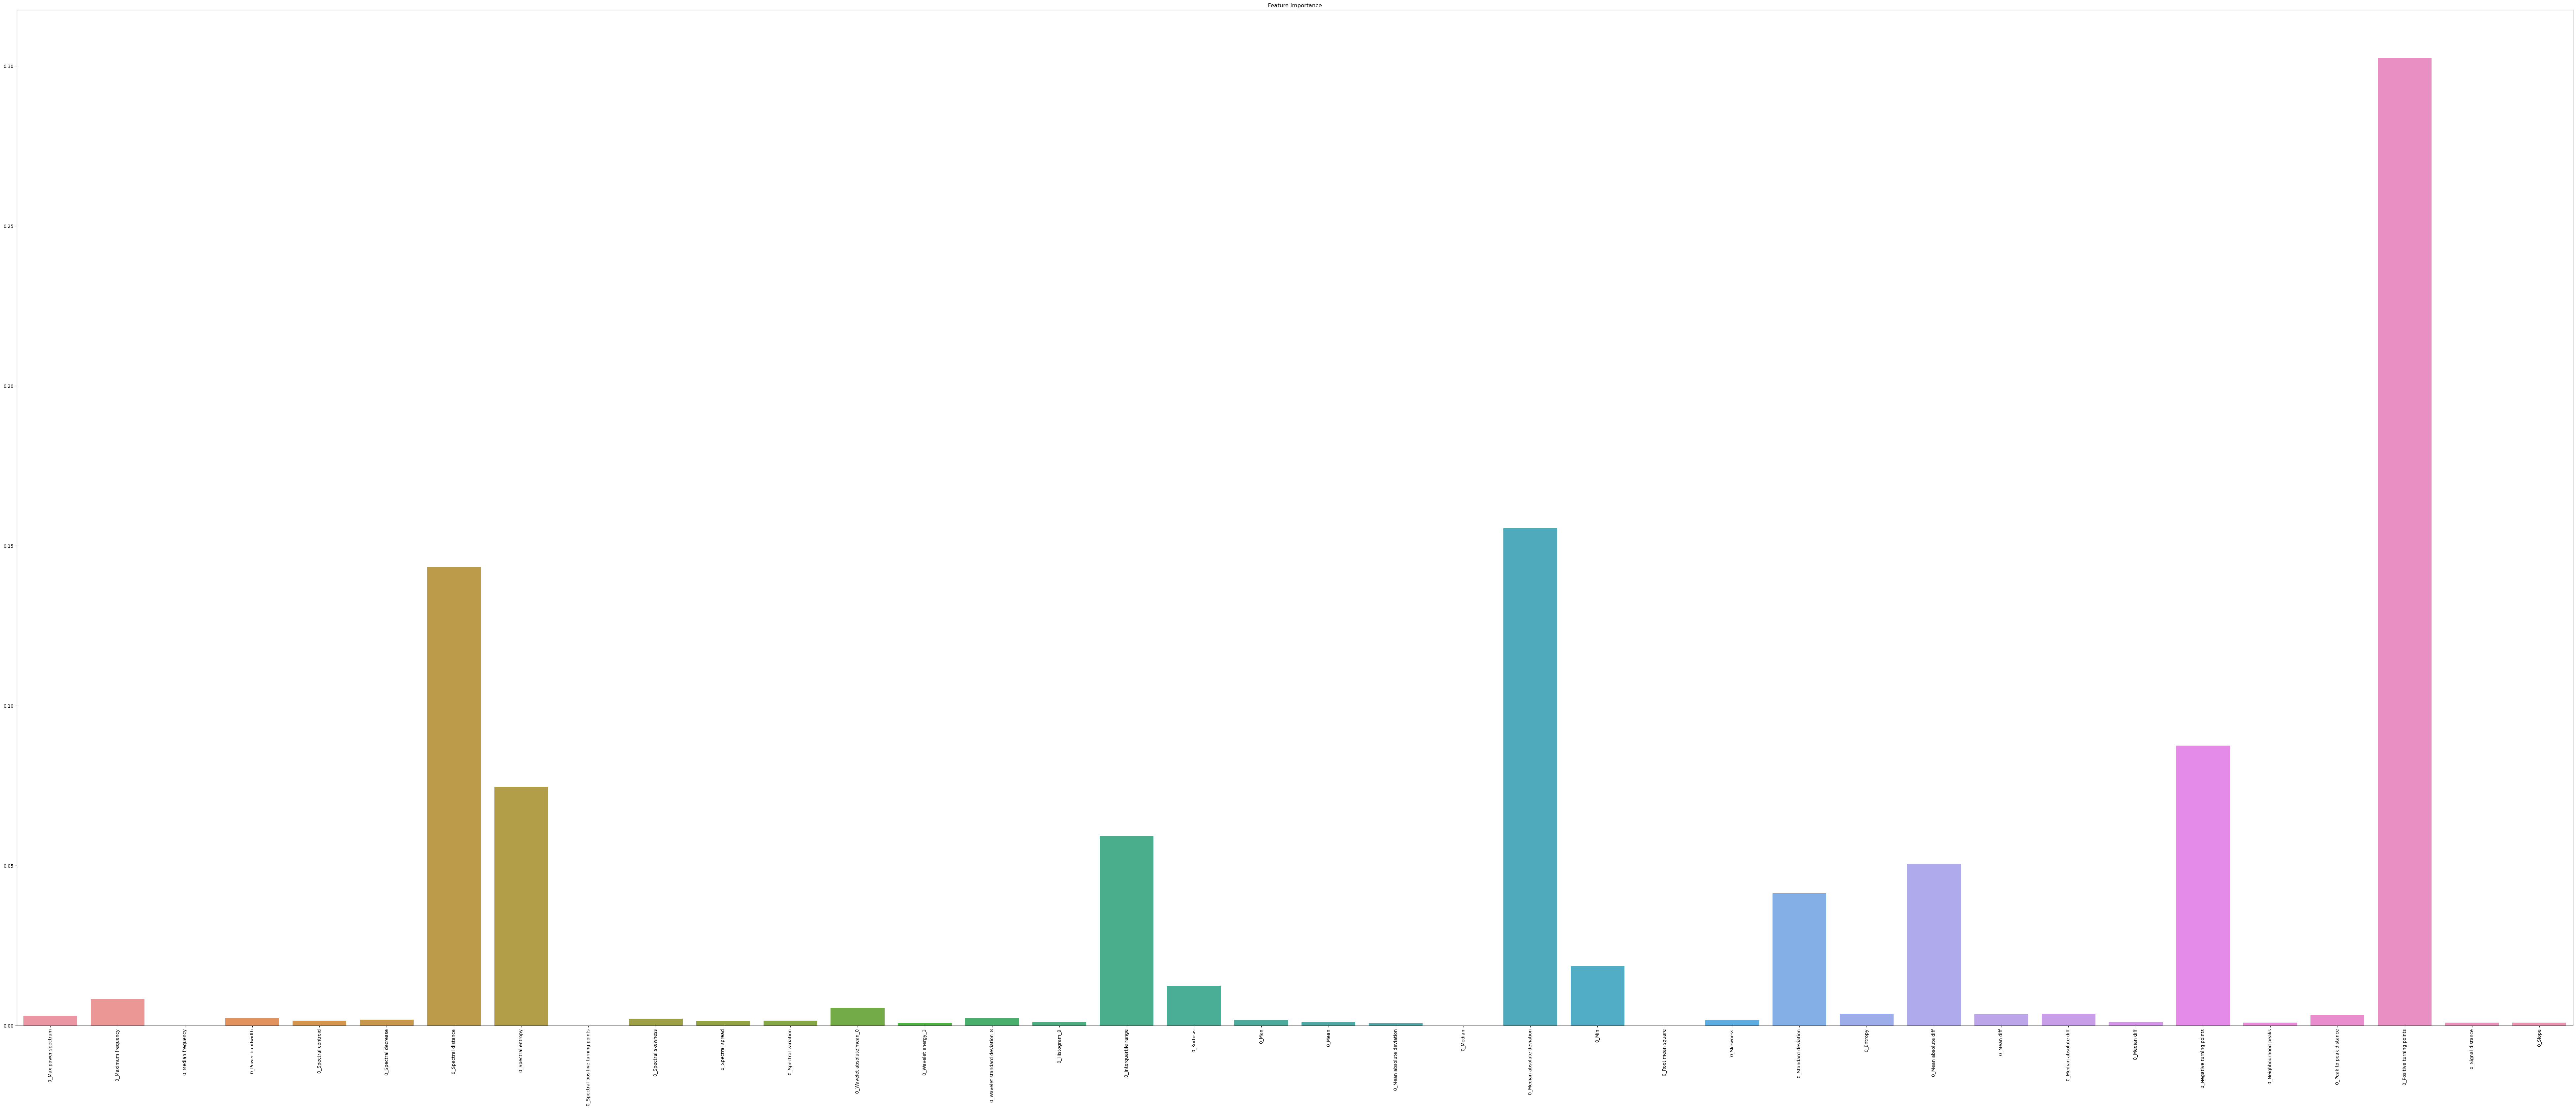

In [22]:
xgb1 = XGBClassifier(n_estimators=500,
                       max_depth=7,
                       learning_rate=0.2,
                       min_child_weight=1,
                       gamma=0.1,
                       num_class=4)

fitXgb(xgb1, training_data)

In [23]:
# loading dependecy
import joblib

filename = "Jendela 400.sav"
joblib.dump(xgb1,filename)

['Jendela 400.sav']

In [24]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

0.9861111111111112
